# Pré Processamento dos dados

# Ana Carolina Chebel Pelissari

# <font color='blue'>Importação das bibliotecas necessárias</font>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from  matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import seaborn as sns
import math

# <font color='blue'>Criação das funções</font>

In [2]:
# Função que gera um histograma que mostra o numero de valores NaN para cada coluna.
def plot_hist_nan(df, plot_name):
        
    nan_df = pd.DataFrame(df.isna().sum().tolist(), df.columns.tolist()).reset_index()
    nan_df.columns = ['column_name', 'total_nan']
    nan_df['nan_perc'] = 100*round(nan_df['total_nan']/len(df),3)
    nan_df = nan_df.sort_values('total_nan', ascending=False)
    nan_df = nan_df[nan_df['total_nan'] > 0]
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    sns.barplot(x="nan_perc", y="column_name", data=nan_df)
    ax.set_ylabel('Colunas', fontsize = 15)
    ax.set_xlabel('NaN %', fontsize = 15)    
    ax.tick_params(length=10, width=2, labelsize=15)
    
    dst = "../out/"
    if os.path.isdir(dst) == False:
        os.makedirs(dst)
    dst = dst + "/" + plot_name + ".pdf"
    plt.savefig(dst, bbox_inches = 'tight')
    
    plt.show()

In [3]:
def plot_class_distribution(df: pd.DataFrame):
    values = df.groupby('morte_menor_28d')['morte_menor_28d'].count()
    n_samples = df.shape[0]
    
    plt.figure(figsize=(10,6))
    labels = ['Alive', 'Death']
    explode = (0, 0.4) 
    colors = ['#66b3ff','#ff9999']

    plt.pie(values, colors = colors, autopct='%1.1f%%',
        startangle=90, pctdistance=0.85, explode=explode)

    plt.legend(labels,loc=1)

    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)  
    plt.tight_layout()

    fig.text(0.42, 0.5, "{} samples".format(n_samples), style='italic', fontsize=12)
    plt.show()

# <font color='blue'>Importação do arquivo csv como dataframe</font>

Link da Base de dados : https://doi.org/10.7303/syn22240254

In [9]:
#path = '../../data/df_cat_and_num.csv'
path = 'spneodeath.csv'
df = pd.read_csv(path, low_memory=False)

In [11]:
df.rename(columns={'tp_birth_place': 'n_tp_ocorrencia',
                   'maternal_age': 'n_nu_idade', 
                   'tp_marital_status': 'n_tp_estado_civil', 
                   'tp_maternal_education_years': 'n_tp_escolaridade',
                   'num_live_births': 'n_qt_nascidos_vivos',
                   'num_fetal_losses': 'n_qt_nascidos_mortos',
                   'tp_pregnancy_duration': 'n_tp_gestacao',
                   'tp_pregnancy': 'n_tp_gravidez',
                   'tp_labor': 'n_tp_parto',
                   'tp_prenatal_appointments': 'n_tp_prenatal',
                   'cd_apgar1': 'n_nu_apgar1',
                   'cd_apgar5': 'n_nu_apgar5',
                   'newborn_weight': 'n_nu_peso',
                   'has_congenital_malformation': 'n_st_malformacao',
                   'tp_maternal_skin_color': 'n_tp_raca_cor_mae',
                   'num_gestations': 'n_qt_gestacao_anterior',
                   'num_normal_labors': 'n_qt_parto_normal',
                   'num_cesarean_labors': 'n_qt_parto_cesarea',
                   'num_gestational_weeks': 'n_nu_semana_gestacao',
                   'tp_presentation_newborn': 'n_tp_apresentacao',
                   'tp_childbirth_assistance': 'n_tp_nascimento_assistido',
                   'tp_fill_form_responsible': 'n_tp_funcao_responsavel',
                   'cd_robson_group': 'n_tp_grupo_robson',
                   'neonatal_death': 'morte_menor_28d'},
                   inplace=True)

In [12]:
df.columns

Index(['n_tp_ocorrencia', 'n_nu_idade', 'n_tp_estado_civil',
       'n_tp_escolaridade', 'n_qt_nascidos_vivos', 'n_qt_nascidos_mortos',
       'n_tp_gestacao', 'n_tp_gravidez', 'n_tp_parto', 'n_tp_prenatal',
       'n_nu_apgar1', 'n_nu_apgar5', 'n_nu_peso', 'n_st_malformacao',
       'n_tp_raca_cor_mae', 'n_qt_gestacao_anterior', 'n_qt_parto_normal',
       'n_qt_parto_cesarea', 'n_nu_semana_gestacao', 'n_tp_apresentacao',
       'n_tp_nascimento_assistido', 'n_tp_funcao_responsavel',
       'n_tp_grupo_robson', 'morte_menor_28d'],
      dtype='object')

In [13]:
print("The dataset has {} many rows and {} columns".format(df.shape[0], df.shape[1]))

The dataset has 1435834 many rows and 24 columns


<a id='minor_data_prep'></a>
# <font color='blue'>Pré Processamento dos dados</font>

* Converte o tipo de todas as colunas para inteiro(int);
* Substitui valores NaN(faltantes) e valores que não são válidos na categorização, pela moda/média de cada coluna;

In [14]:
# Printa os valores únicos de cada coluna
cols = df.columns
for col in cols:
    print('Column: {} - Type: {}'.format(col, df[col].dtypes))
    print(df[col].unique())
    print('\n')

Column: n_tp_ocorrencia - Type: int64
[1 3 2 4]


Column: n_nu_idade - Type: int64
[32 40 31 19 33 28 27 34 29 26 16 37 25 35 23 24 41 38 20 21 18 17 22 36
 30 15 39 43 45 42 14 44 50 13 46 51 48 47 54 49 12 55 58 52 56 57 53 11
 59 10 63 60]


Column: n_tp_estado_civil - Type: float64
[ 2.  1.  5.  4. nan  3.  9.]


Column: n_tp_escolaridade - Type: float64
[ 4.  3.  5.  2.  1. nan  0.  9.]


Column: n_qt_nascidos_vivos - Type: int64
[ 1  4  2  5  0  3  6  8 10  7  9 12 13 11 14 15 18]


Column: n_qt_nascidos_mortos - Type: int64
[ 0  1  2  3 10  4  5 11  6  7  9 18 13  8 17 12 14 19]


Column: n_tp_gestacao - Type: float64
[ 5.  4. nan  6.  2.  3.  1.]


Column: n_tp_gravidez - Type: float64
[ 1.  2.  3. nan]


Column: n_tp_parto - Type: float64
[ 2.  1. nan]


Column: n_tp_prenatal - Type: int64
[4 2 3 1]


Column: n_nu_apgar1 - Type: int64
[ 9  8 10  4  7  3  6  5  1  0  2]


Column: n_nu_apgar5 - Type: int64
[10  9  8  7  2  6  0  5  3  1  4]


Column: n_nu_peso - Type: int64
[365

In [15]:
# Conversão de todos os valores de todas as colunas em valores inteiros. 
# Convertendo os valores com string vazias em NaN.

cols = df.columns

for col in cols:
    if col:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].astype('Int64')

In [16]:
nan_df = pd.DataFrame(df.isna().sum().tolist(), df.columns.tolist()).reset_index()
nan_df.columns = ['nome_da_coluna', 'total_nan']
nan_df['porc_nan'] = 100*round(nan_df['total_nan']/len(df),5)
nan_df = nan_df.sort_values('total_nan', ascending=False)
nan_df = nan_df[nan_df['total_nan'] > 0]
#nan_df = nan_df.tail(12)

In [17]:
nan_df

,nome_da_coluna,total_nan,porc_nan
21,n_tp_funcao_responsavel,153768,10.709
14,n_tp_raca_cor_mae,153240,10.673
19,n_tp_apresentacao,153190,10.669
20,n_tp_nascimento_assistido,153180,10.668
22,n_tp_grupo_robson,139434,9.711
6,n_tp_gestacao,1692,0.118
2,n_tp_estado_civil,1348,0.094
3,n_tp_escolaridade,579,0.040
13,n_st_malformacao,272,0.019
8,n_tp_parto,34,0.002


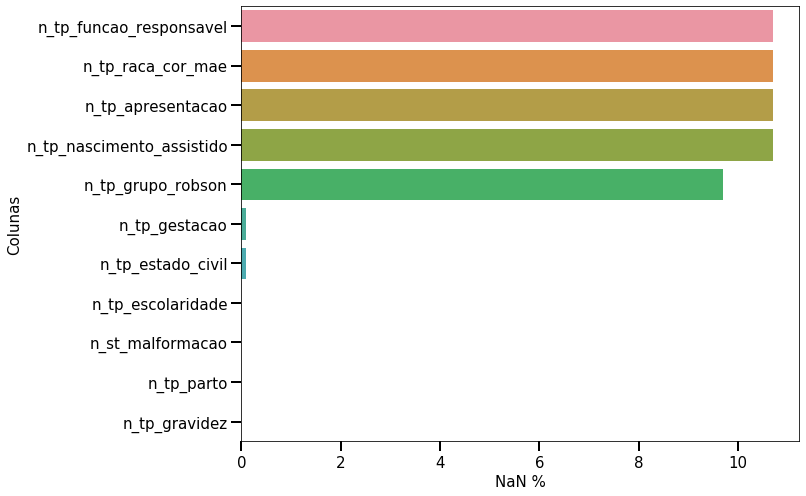

In [18]:
# Como as strings vazias foram convertidas em valores NaN, segue um gráfico apresentando a quantidade de valores NaN.

plot_hist_nan(df[df.columns], 'barplot_nan')

In [20]:
# As colunas que tem pelo menos 1 valor NaN, terão este valor substituido pela moda/média da própria coluna.

cols_nan = ['n_tp_funcao_responsavel', 'n_tp_raca_cor_mae', 'n_tp_apresentacao', 'n_tp_nascimento_assistido',
            'n_tp_grupo_robson', 'n_tp_gestacao', 'n_tp_estado_civil', 'n_tp_escolaridade',
            'n_st_malformacao', 'n_tp_parto', 'n_tp_gravidez']

cols_df = df.columns

for col in cols_df:
    df[col].replace([0,9], df[col].mode()[0], inplace=True)

for col in cols_nan:
    df[col] = df[col].fillna(df[col].mode()[0])
    
#df['o_sg_sexo'].replace(['I'], df['o_sg_sexo'].mode()[0], inplace=True)

In [21]:
cols = df.columns

for col in cols:
    if col:
        df[col] = df[col].astype('int64')

In [23]:
df.to_csv('df_neonatal_sao_paulo.csv')